In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [17]:
df = pd.read_csv('../data/AKG.csv')

In [18]:
df.head(-1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-10,9.133726,9.272116,9.133726,9.272116,9.272116,43355
1,2018-10-11,9.272116,9.272116,9.272116,9.272116,9.272116,0
2,2018-10-12,9.272116,9.272116,9.272116,9.272116,9.272116,0
3,2018-10-15,9.272116,9.272116,9.272116,9.272116,9.272116,0
4,2018-10-16,9.064531,9.064531,8.926142,8.995337,8.995337,43355
...,...,...,...,...,...,...,...
1381,2024-05-21,19.650000,19.799999,18.900000,19.150000,19.150000,52131
1382,2024-05-22,19.299999,19.750000,17.900000,19.549999,19.549999,39457
1383,2024-05-23,19.549999,20.500000,19.500000,20.200001,20.200001,67247
1384,2024-05-24,20.200001,22.450001,20.049999,21.150000,21.150000,470635


### check and clean null values

In [21]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [22]:
df.dropna(inplace=True)

### normalize data

In [24]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.head(-1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-10,0.020392,0.023284,0.021664,0.023764,0.023764,0.010540
1,2018-10-11,0.023790,0.023284,0.025274,0.023764,0.023764,0.000000
2,2018-10-12,0.023790,0.023284,0.025274,0.023764,0.023764,0.000000
3,2018-10-15,0.023790,0.023284,0.025274,0.023764,0.023764,0.000000
4,2018-10-16,0.018692,0.018294,0.016248,0.016974,0.016974,0.010540
...,...,...,...,...,...,...,...
1381,2024-05-21,0.278651,0.276324,0.276469,0.266082,0.266082,0.012674
1382,2024-05-22,0.270056,0.275123,0.250378,0.275895,0.275895,0.009593
1383,2024-05-23,0.276195,0.293149,0.292123,0.291840,0.291840,0.016349
1384,2024-05-24,0.292158,0.340018,0.306472,0.315145,0.315145,0.114421


### visualize data

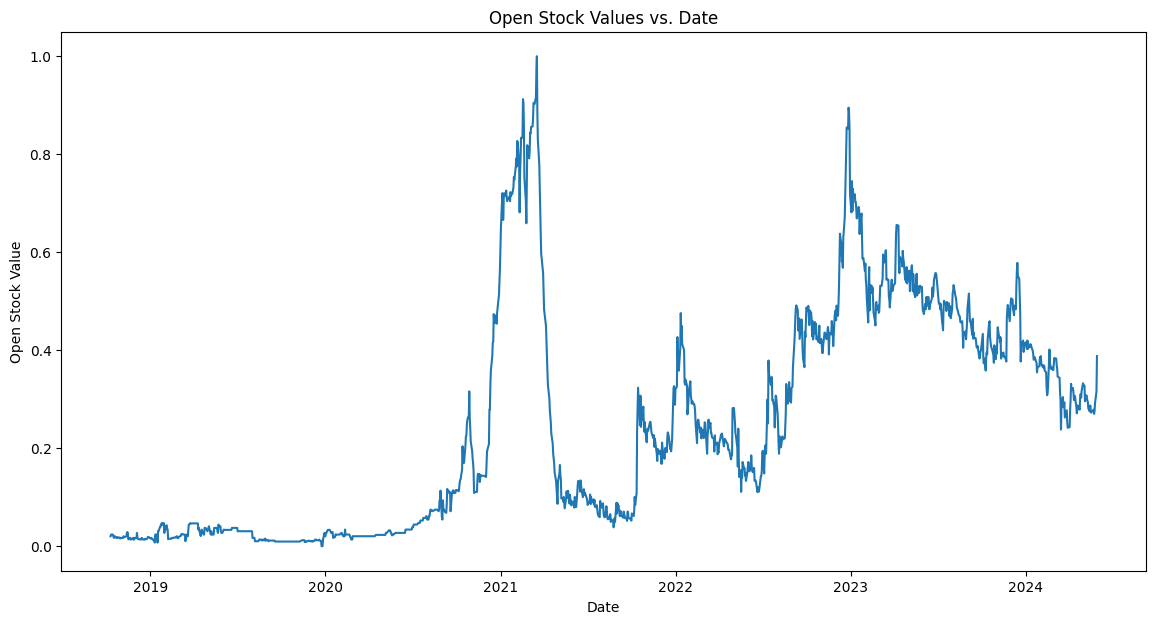

In [25]:
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Date', y='Open')
plt.title('Open Stock Values vs. Date')
plt.xlabel('Date')
plt.ylabel('Open Stock Value')
plt.show()